<a href="https://colab.research.google.com/github/nnttluna/brain_aging-regression/blob/main/brain_age_regression_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Portfolio/brain_age_regression.csv')
print(data.head())

   S.No  Left-Lateral-Ventricle  Left-Inf-Lat-Vent  \
0     1                 22916.9              982.7   
1     2                 22953.2              984.5   
2     3                 23320.4             1062.1   
3     4                 24360.0             1000.5   
4     5                 25769.4             1124.4   

   Left-Cerebellum-White-Matter  Left-Cerebellum-Cortex  Left-Thalamus  \
0                       15196.7                 55796.4         6855.5   
1                       15289.7                 55778.6         6835.1   
2                       15382.1                 55551.2         7566.0   
3                       14805.4                 54041.8         8004.6   
4                       16331.1                 54108.6         6677.4   

   Left-Caudate  Left-Putamen  Left-Pallidum  3rd-Ventricle  ...  \
0        2956.4        4240.7         2223.9         2034.4  ...   
1        3064.2        4498.6         2354.1         1927.1  ...   
2        3231.7        445

In [43]:
# Separate Target Variable and Predictor Variables
X=data['Age'].values

#col_header = list(data.columns)
col_header = ['Left-Lateral-Ventricle', 'Left-Inf-Lat-Vent', 'Left-Cerebellum-White-Matter', 'Left-Cerebellum-Cortex','Left-Thalamus', 'Left-Caudate', 'Left-Putamen', 'Left-Pallidum','3rd-Ventricle','4th-Ventricle','Brain-Stem','Left-Hippocampus','Left-Amygdala', 'CSF','Left-Accumbens-area','Left-VentralDC',
'Left-vessel','Left-choroid-plexus','Right-Lateral-Ventricle','Right-Inf-Lat-Vent','Right-Cerebellum-White-Matter',
'Right-Cerebellum-Cortex', 'Right-Thalamus','Right-Caudate','Right-Putamen',
'Right-Pallidum','Right-Hippocampus','Right-Amygdala','Right-Accumbens-area',
'Right-VentralDC','Right-vessel','Right-choroid-plexus',
'5th-Ventricle','WM-hypointensities','Left-WM-hypointensities',
'Right-WM-hypointensities','non-WM-hypointensities','Left-non-WM-hypointensities',
'Right-non-WM-hypointensities','Optic-Chiasm','CC_Posterior','CC_Mid_Posterior',
'CC_Central','CC_Mid_Anterior','CC_Anterior','BrainSegVol','BrainSegVolNotVent']

y = data[col_header].values

#  y=data[['Left-Lateral-Ventricle', 'Left-Inf-Lat-Vent', 'Left-Cerebellum-White-Matter', 'Left-Cerebellum-Cortex','Left-Thalamus', 'Left-Caudate', 'Left-Putamen', 'Left-Pallidum','3rd-Ventricle','4th-Ventricle',
#        'Brain-Stem','Left-Hippocampus','Left-Amygdala', 'CSF','Left-Accumbens-area','Left-VentralDC',
#        'Left-vessel','Left-choroid-plexus','Right-Lateral-Ventricle','Right-Inf-Lat-Vent','Right-Cerebellum-White-Matter',
#        'Right-Cerebellum-Cortex', 'Right-Thalamus','Right-Caudate','Right-Putamen',
#        'Right-Pallidum','Right-Hippocampus','Right-Amygdala','Right-Accumbens-area',
#        'Right-VentralDC','Right-vessel','Right-choroid-plexus',
#        '5th-Ventricle','WM-hypointensities','Left-WM-hypointensities',
#        'Right-WM-hypointensities','non-WM-hypointensities','Left-non-WM-hypointensities',
#        'Right-non-WM-hypointensities','Optic-Chiasm','CC_Posterior','CC_Mid_Posterior',
#        'CC_Central','CC_Mid_Anterior','CC_Anterior','BrainSegVol','BrainSegVolNotVent']].values

In [33]:
!pip install scikeras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import math

In [34]:
train = data[:4000]
test = data[4000:]
val_X = X[4000:]
val_y = y[4000:]

In [35]:
NN_model = Sequential()
# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))
# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               18176     
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 183041 (715.00 KB)
Trainable params: 183041 (715.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [37]:
NN_model.fit(train, X, epochs=12, batch_size=100, validation_split = 0.2, callbacks=callbacks_list, verbose=0)


Epoch 1: val_loss improved from inf to 99.60571, saving model to Weights-001--99.60571.hdf5

Epoch 2: val_loss did not improve from 99.60571


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss did not improve from 99.60571

Epoch 4: val_loss improved from 99.60571 to 67.97521, saving model to Weights-004--67.97521.hdf5

Epoch 5: val_loss did not improve from 67.97521

Epoch 6: val_loss did not improve from 67.97521

Epoch 7: val_loss improved from 67.97521 to 52.91415, saving model to Weights-007--52.91415.hdf5

Epoch 8: val_loss improved from 52.91415 to 30.62705, saving model to Weights-008--30.62705.hdf5

Epoch 9: val_loss improved from 30.62705 to 27.20396, saving model to Weights-009--27.20396.hdf5

Epoch 10: val_loss did not improve from 27.20396

Epoch 11: val_loss did not improve from 27.20396

Epoch 12: val_loss improved from 27.20396 to 11.06651, saving model to Weights-012--11.06651.hdf5


In [38]:
# Load weights file of the best model :
weights_file = 'Weights-012--11.65026.hdf5' # choose the best checkpoint
NN_model.load_weights(weights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [39]:
from keras import backend as K
predictions = NN_model.predict(test)
MSE = mean_squared_error(val_X, predictions)
Rsquared = r2_score(val_X, predictions)
total_cases = len(val_X) # size of validation set
avg = 0.0
SSres = 0.0
SStot = 0.0
for i in range(total_cases):
  value = val_X[i]
  predict = predictions[i]
  avg = (avg + value)/2
  SSres = SSres + (value - predict)**2
  SStot = SStot + (value - avg)**2
  #print(value, '--------- ' , predict)
Rsquared_cal = 1 - SStot/SSres
rmse = math.sqrt(MSE)
print ('NN R squared', Rsquared_cal)
print('NN RMSE = ', rmse)

8/8 [==============================] - 0s 2ms/step
NN R squared [0.9650553]
NN RMSE =  15.452741886025926


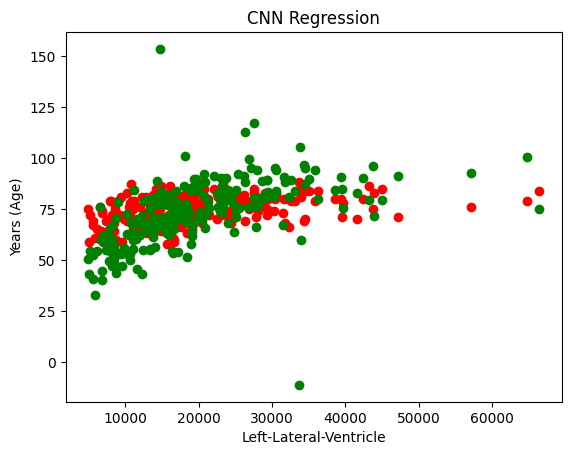

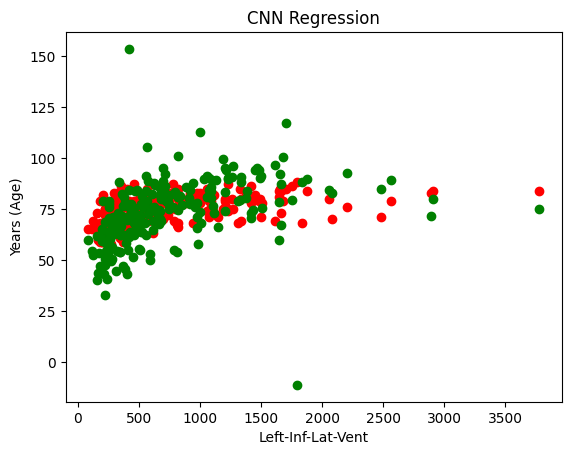

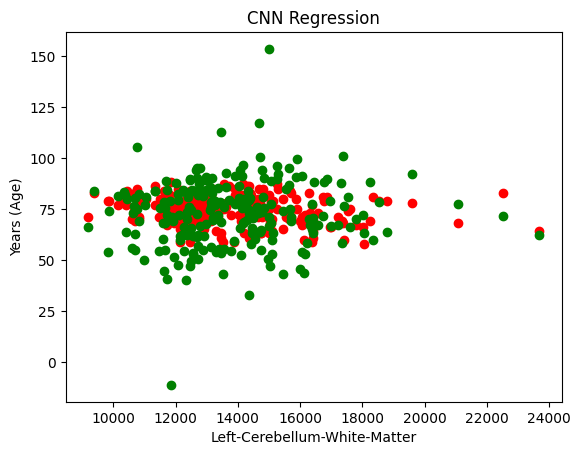

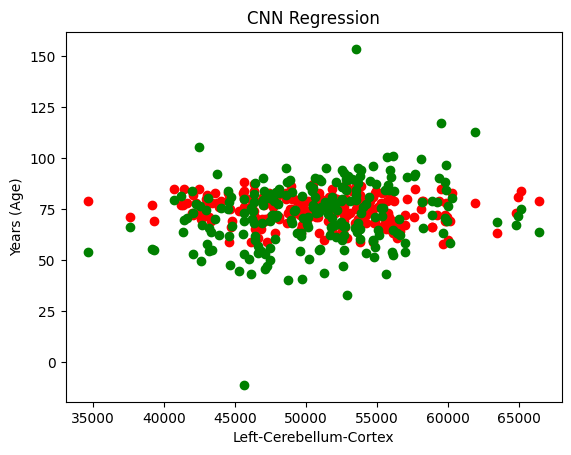

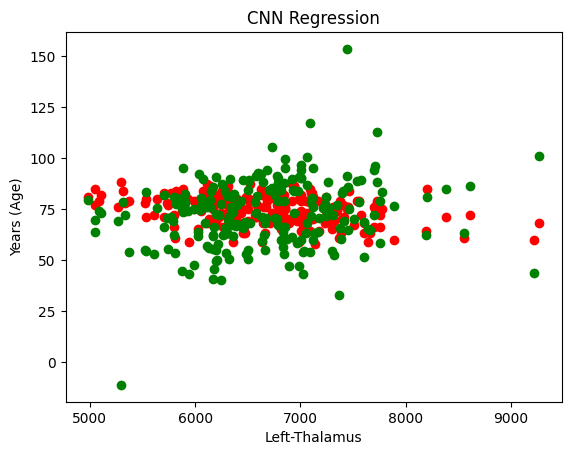

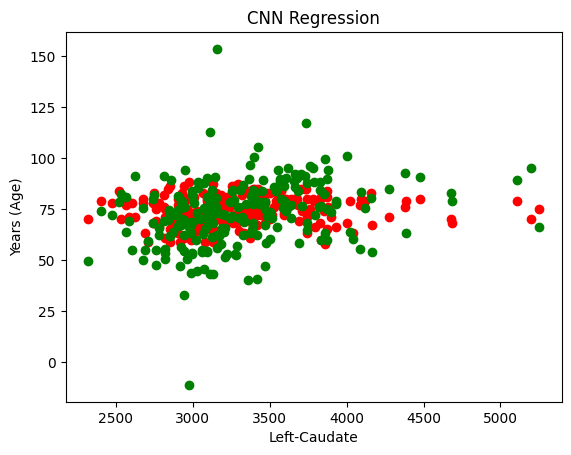

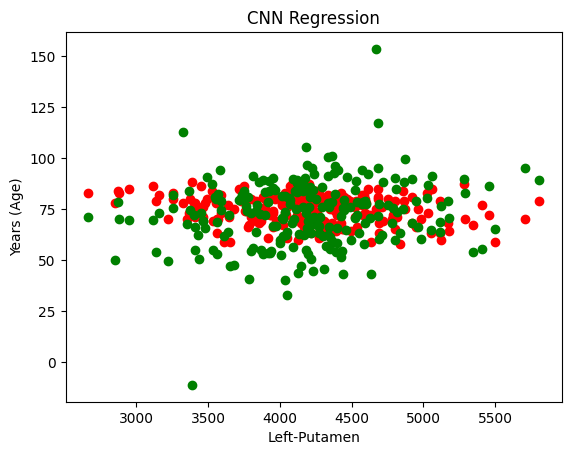

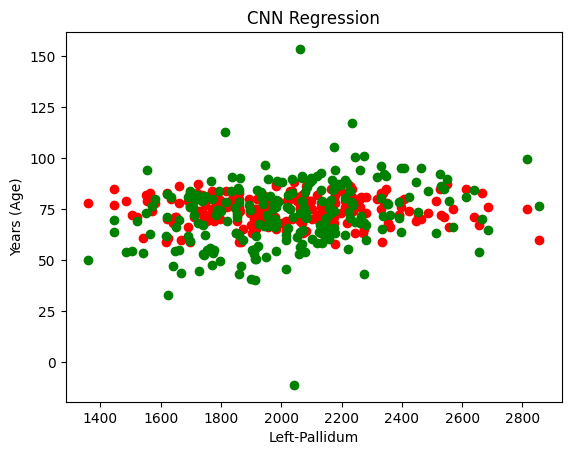

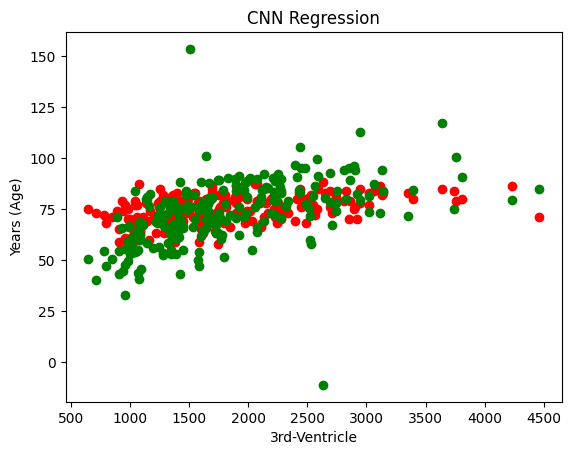

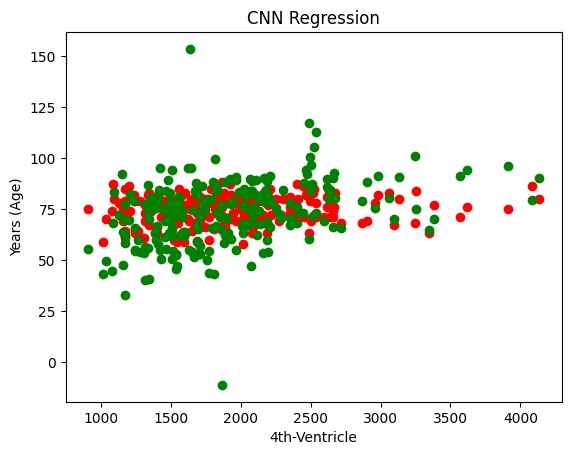

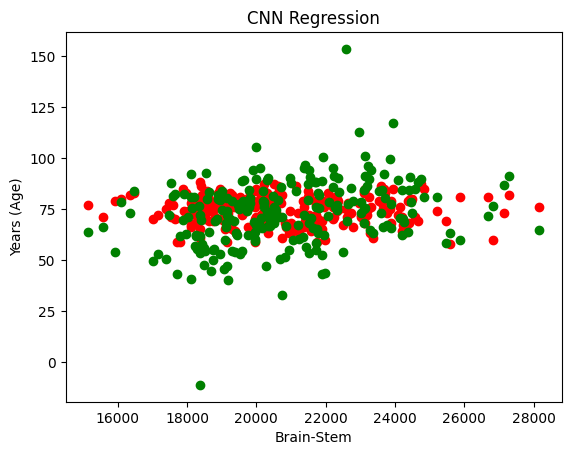

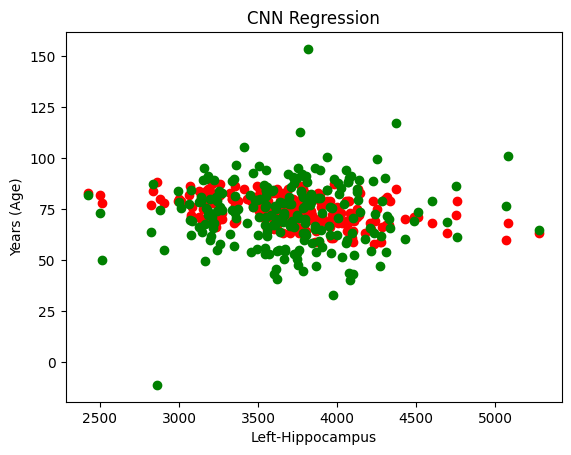

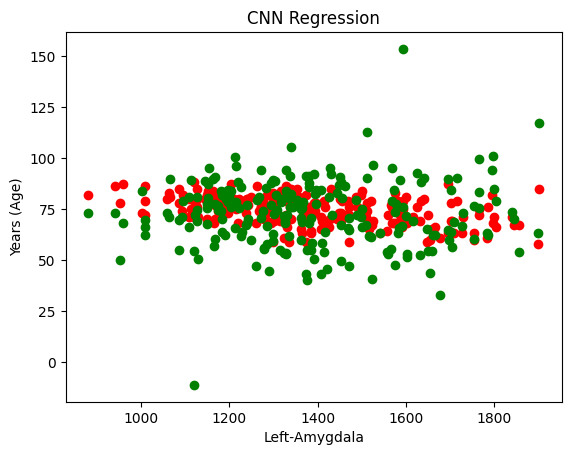

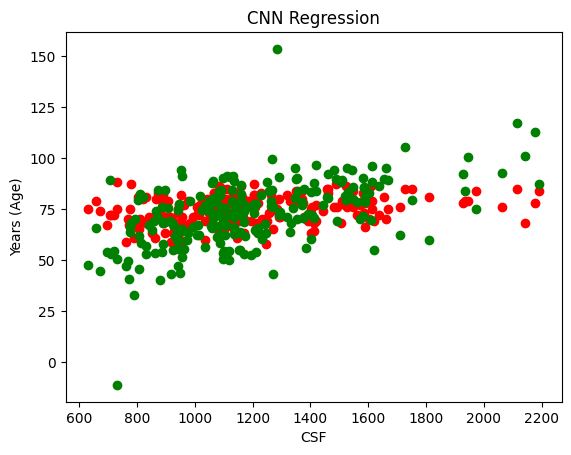

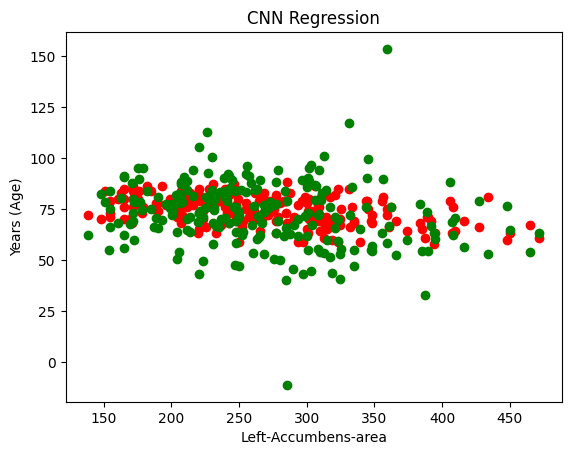

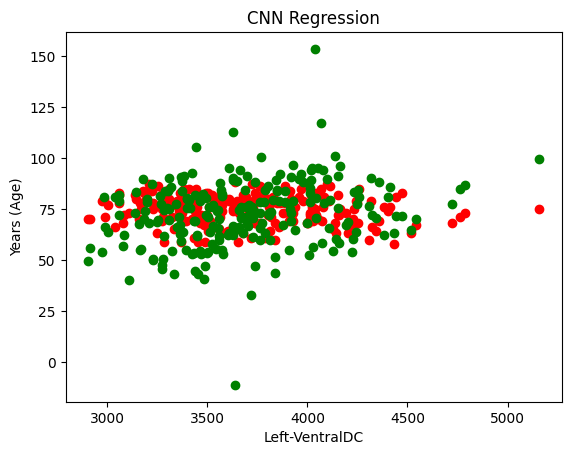

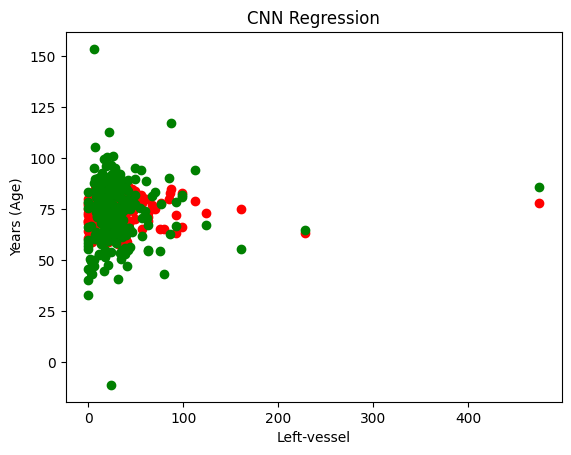

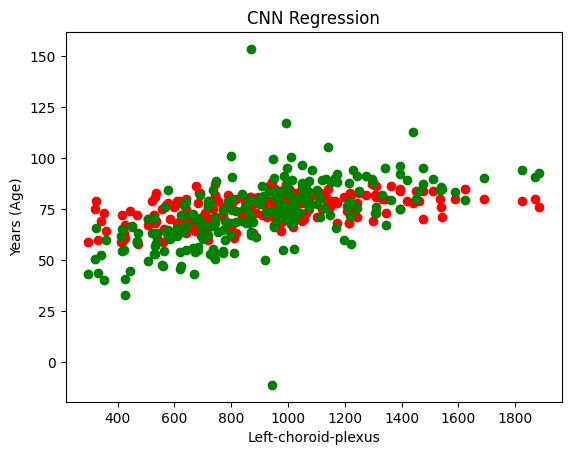

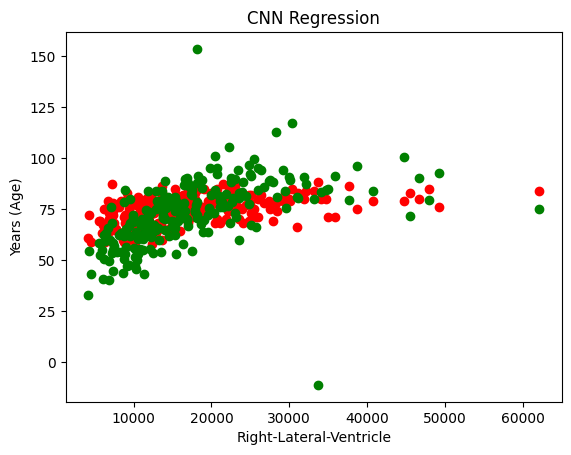

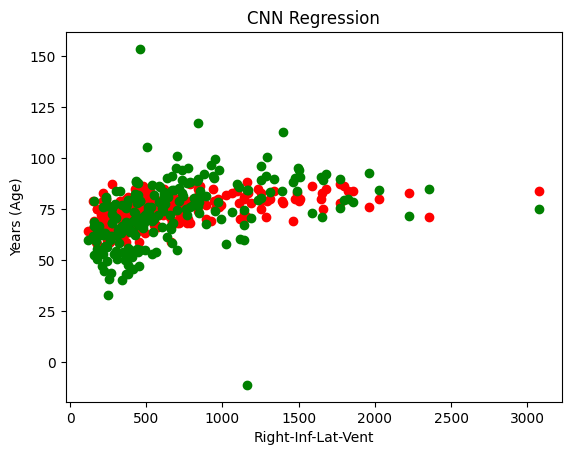

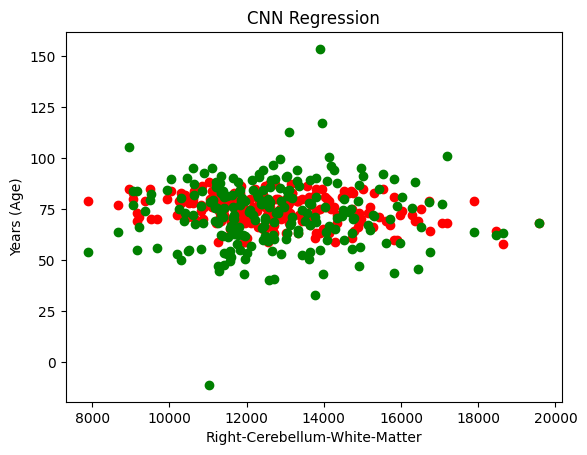

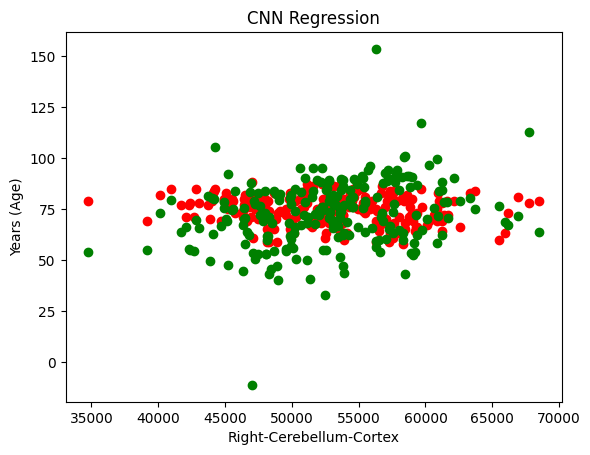

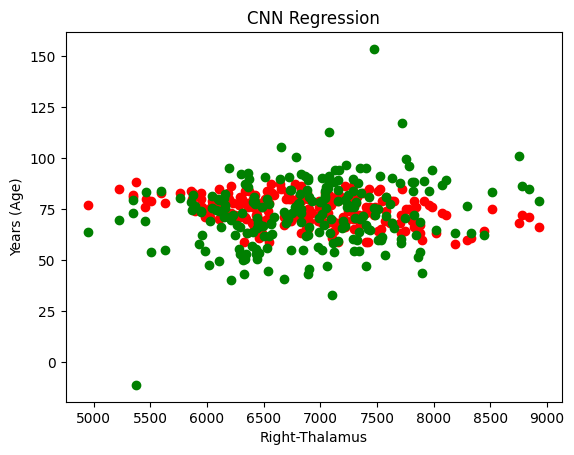

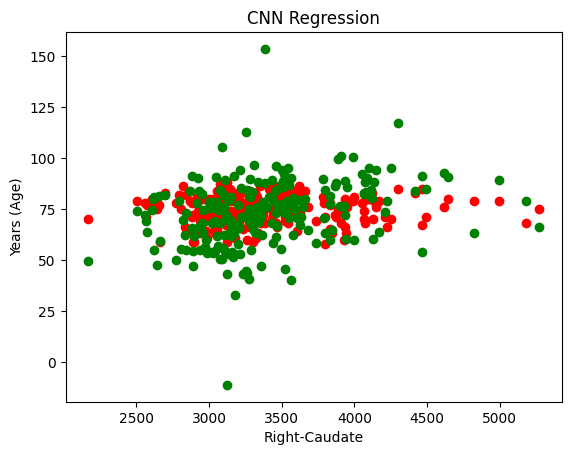

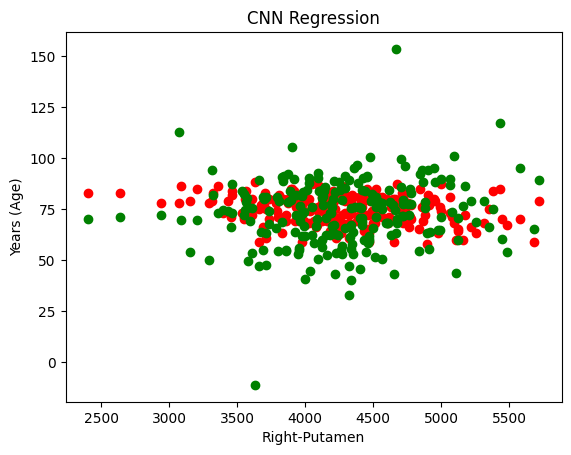

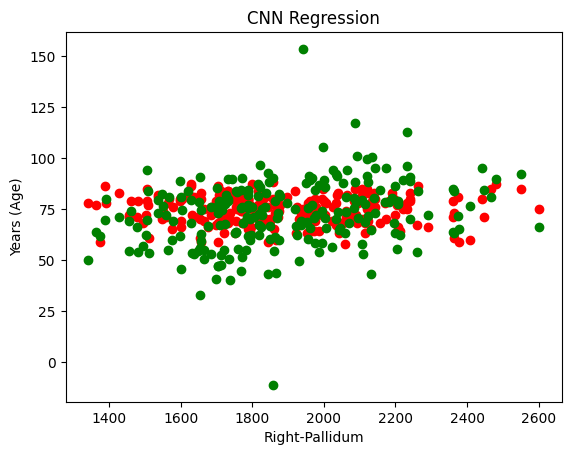

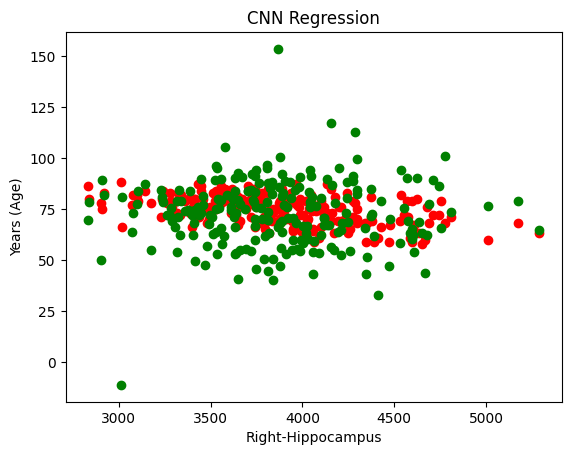

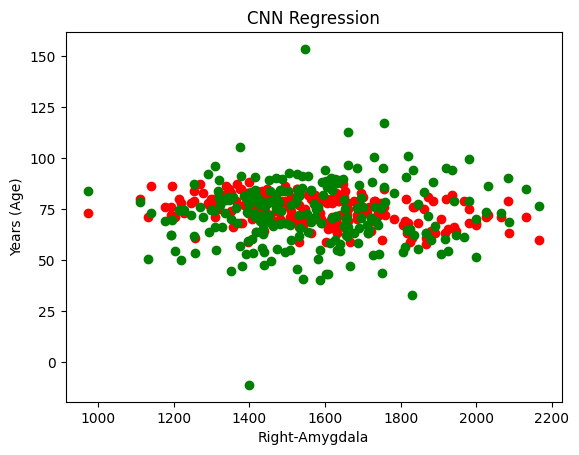

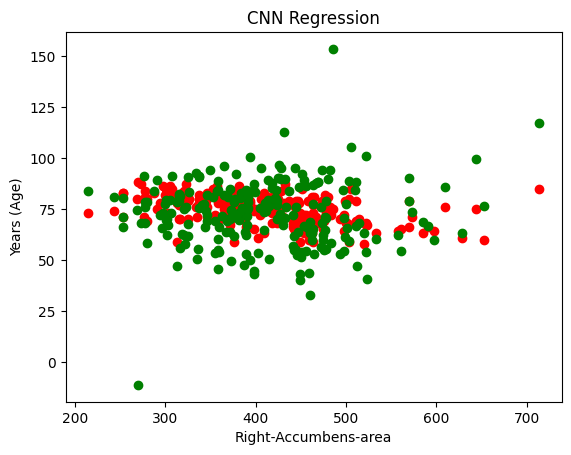

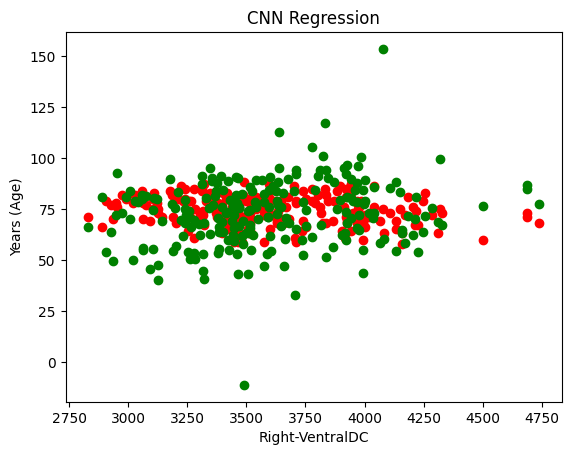

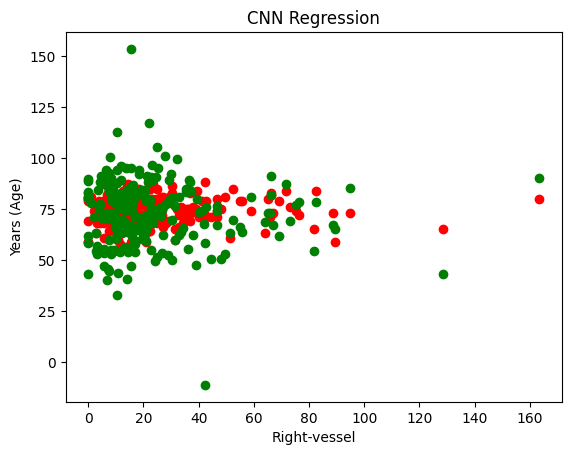

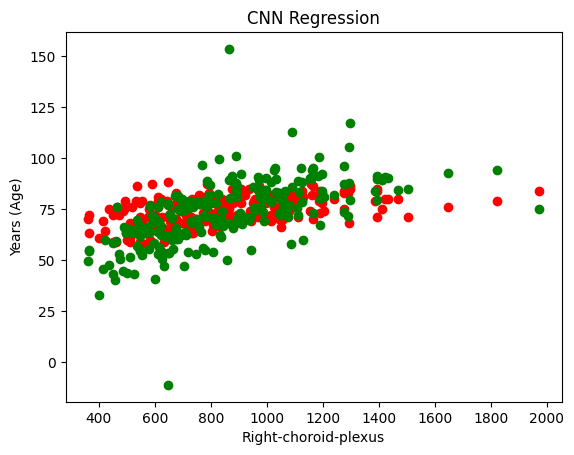

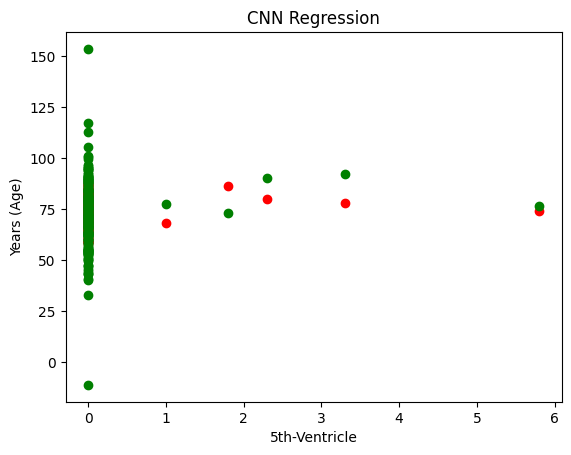

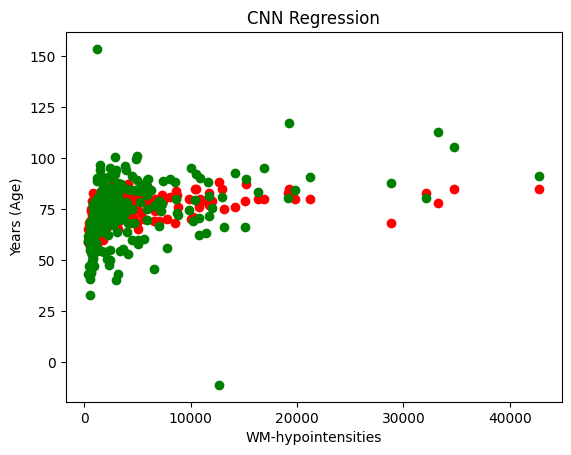

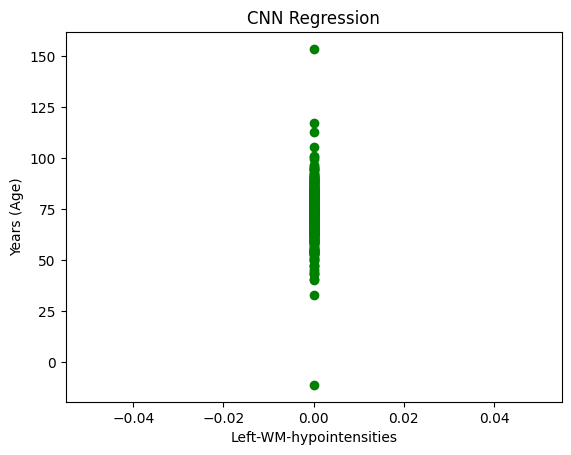

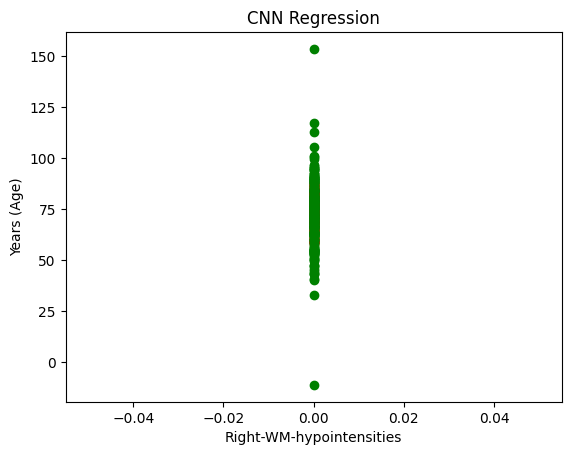

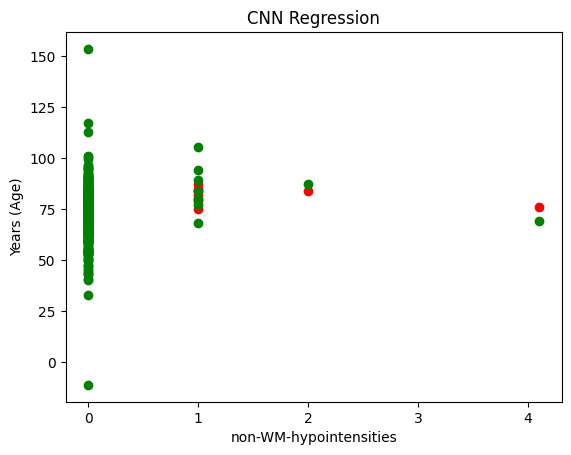

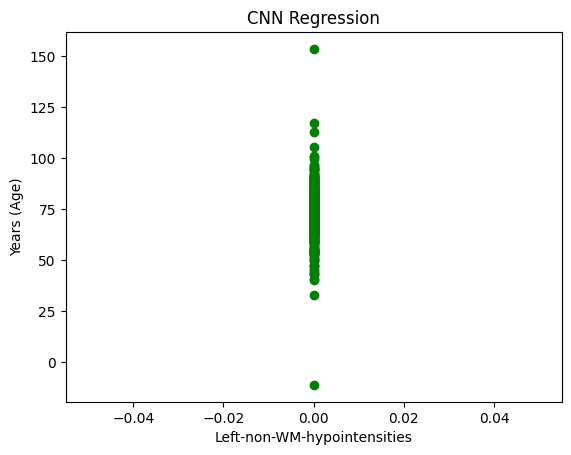

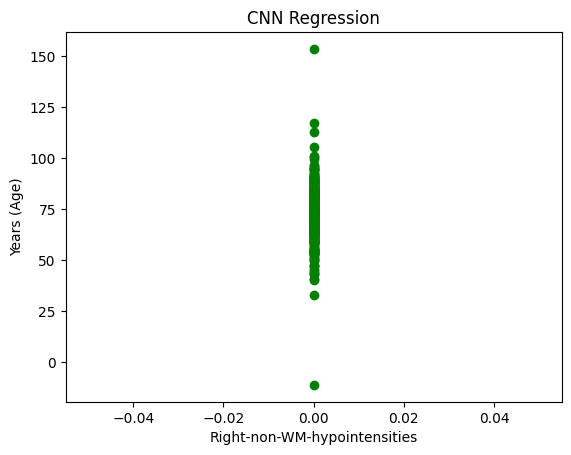

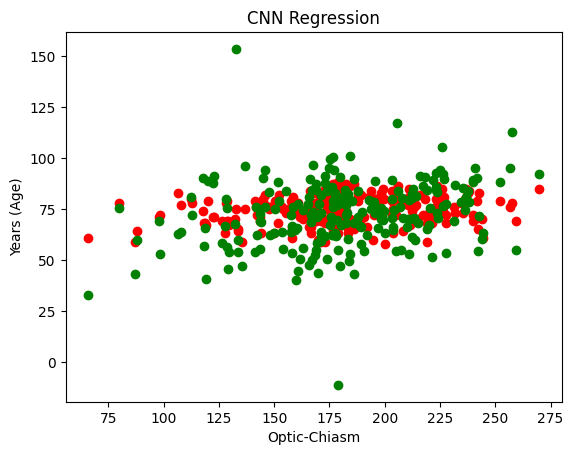

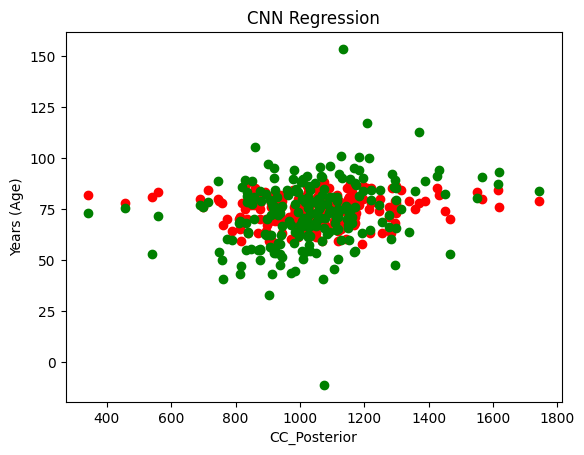

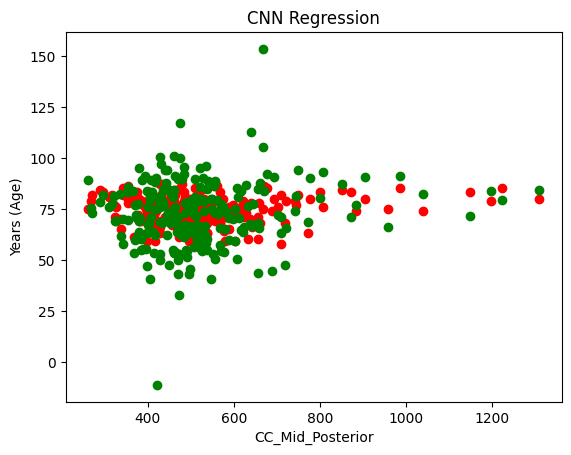

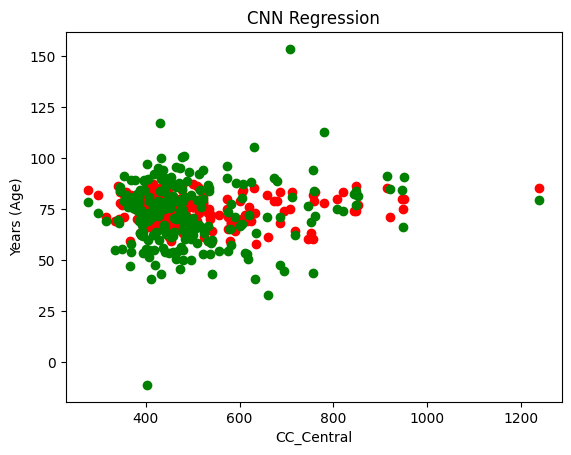

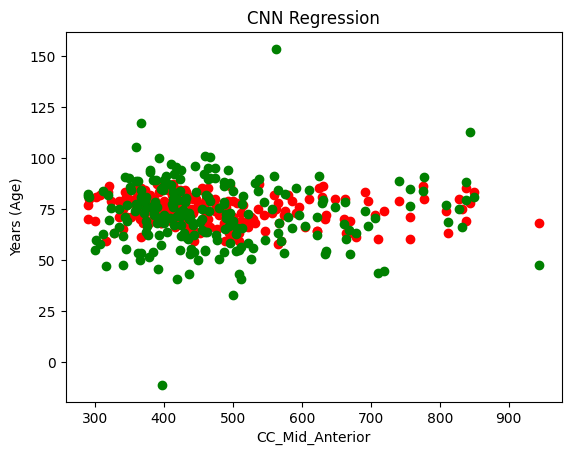

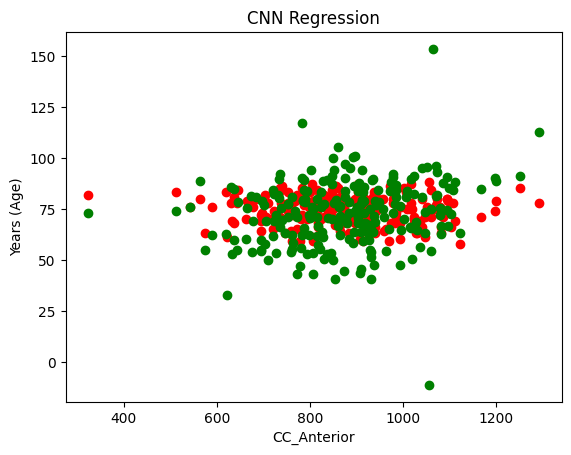

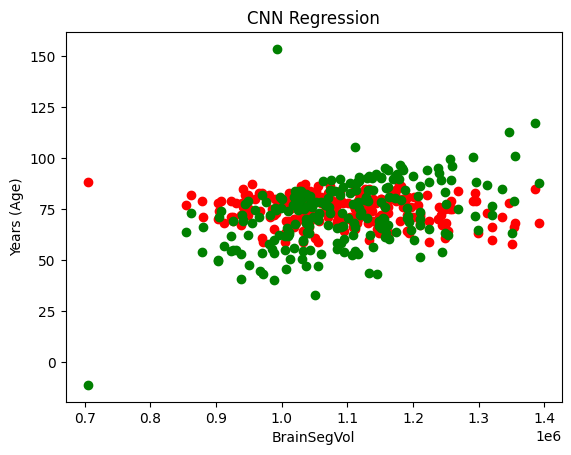

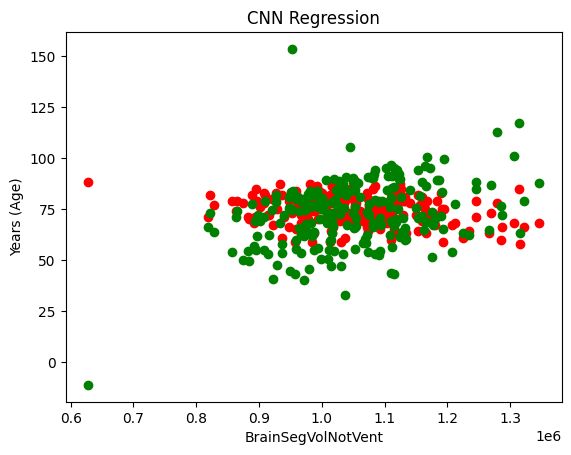

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

for i in range (0,len(val_y[0,:])):
  plt.scatter(val_y[:,i], val_X, color = "red")
  plt.scatter(val_y[:,i], predictions, color = "green")
  plt.title("CNN Regression")
  plt.ylabel("Years (Age)")
  plt.xlabel(col_header[i])
  plt.show()